C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ransac.py:288: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


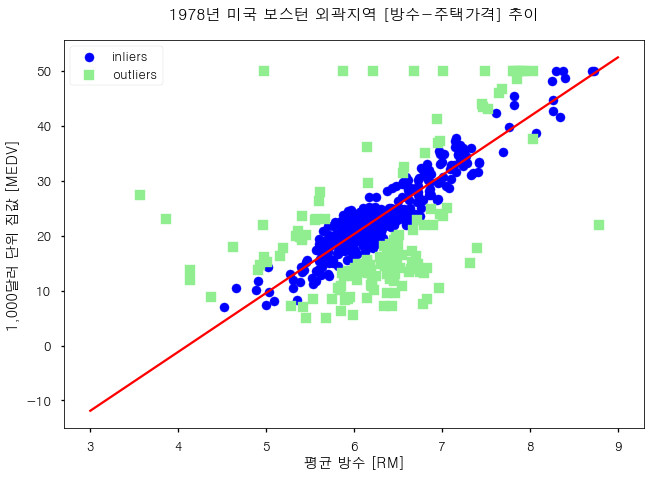

회귀선 기울기: 10.735
절편: -44.089


In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor

style.use('seaborn-talk')

krfont = {'family':'HYGothic-Medium', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('./data/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

X = df[['RM']].values
y = df['MEDV'].values

# C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ransac.py:288: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
#  DeprecationWarning)

# RANSACRegressor의 인자는 다음과 같은 의미를 가진다.
# max_trials : 알고리즘의 최대 반복 횟수
# min_samples : inlier 값으로 무작위로 선택할 샘플의 최소 갯수
# residual_metric : 회귀 모델과 데이터의 오차 측정 함수 지정
# residual_threshold : inlier로 포함시키기 위한 허용 오차

# residual_metric에 지정된 람다 함수는 샘플 데이터와 회귀 모델과의 수직 거리의
# 합을 계산하는 것이다.

ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50,
                        residual_metric=lambda x: np.sum(np.abs(x), axis=1),
                        residual_threshold=5.0, random_state=0)


ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o', label='inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='lightgreen', marker='s', label='outliers')
plt.plot(line_X, line_y_ransac, c='red')
plt.xlabel('평균 방수 [RM]')
plt.ylabel('1,000달러 단위 집값 [MEDV]')
plt.title('1978년 미국 보스턴 외곽지역 [방수-주택가격] 추이\n')
plt.legend(loc=2)
plt.show()

slope = ransac.estimator_.coef_[0]
intercept = ransac.estimator_.intercept_
print('회귀선 기울기: %.3f\n절편: %.3f' %(slope, intercept))